In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer

%time nlp = spacy.load('en_core_web_lg')

/Users/felixputera/anaconda3/envs/fyp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/felixputera/anaconda3/envs/fyp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/Users/felixputera/anaconda3/envs/fyp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/felixputera/anaconda3/envs/fyp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/Users/felixputera/anaconda3/envs/fyp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96,

CPU times: user 8.26 s, sys: 1.03 s, total: 9.29 s
Wall time: 8.84 s


In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi']= 300

In [3]:
!ls -l ../data

total 0
drwxr-xr-x  54 felixputera  staff  1728 Aug 15 09:43 atc
drwxr-xr-x  55 felixputera  staff  1760 Aug 16 21:21 atc_out


In [4]:
PATH = '../data/atc_out'
FILE = 'combined.csv'

In [5]:
combined_data = pd.read_csv(f'{PATH}/{FILE}')

In [6]:
print('Number of samples:',len(combined_data))

Number of samples: 27999


In [7]:
combined_data.head(20)

,from,to,text,time_start,time_end,comment
0,GAA329,F1-1,zero nine zero three twenty nine roger that sir,11.21,13.57,NaN
1,USA268,F1-1,cleared the i l s two seven u s air two sixty ...,20.74,22.75,NaN
2,F1-1,USA268,yes sir two sixty eight contact the tower one ...,22.75,25.44,NaN
3,USA268,F1-1,have a good day,25.43,26.36,NaN
4,F1-1,N01C,cessna zero one charlie v f r descent maintain...,29.62,32.70,NaN
5,N01C,F1-1,three thousand zero one charlie,33.07,34.69,NaN
6,GAA329,F1-1,bizex three twenty nine traffic twelve thirty ...,34.98,40.64,NaN
7,F1-1,GAA329,bizex three twenty nine turn right heading one...,62.26,64.70,NaN
8,GAA329,F1-1,one three zero for three twenty nine,64.94,67.01,NaN
9,GAA329,F1-1,ah we got him in sight now sir bizex three twe...,85.42,89.34,NaN


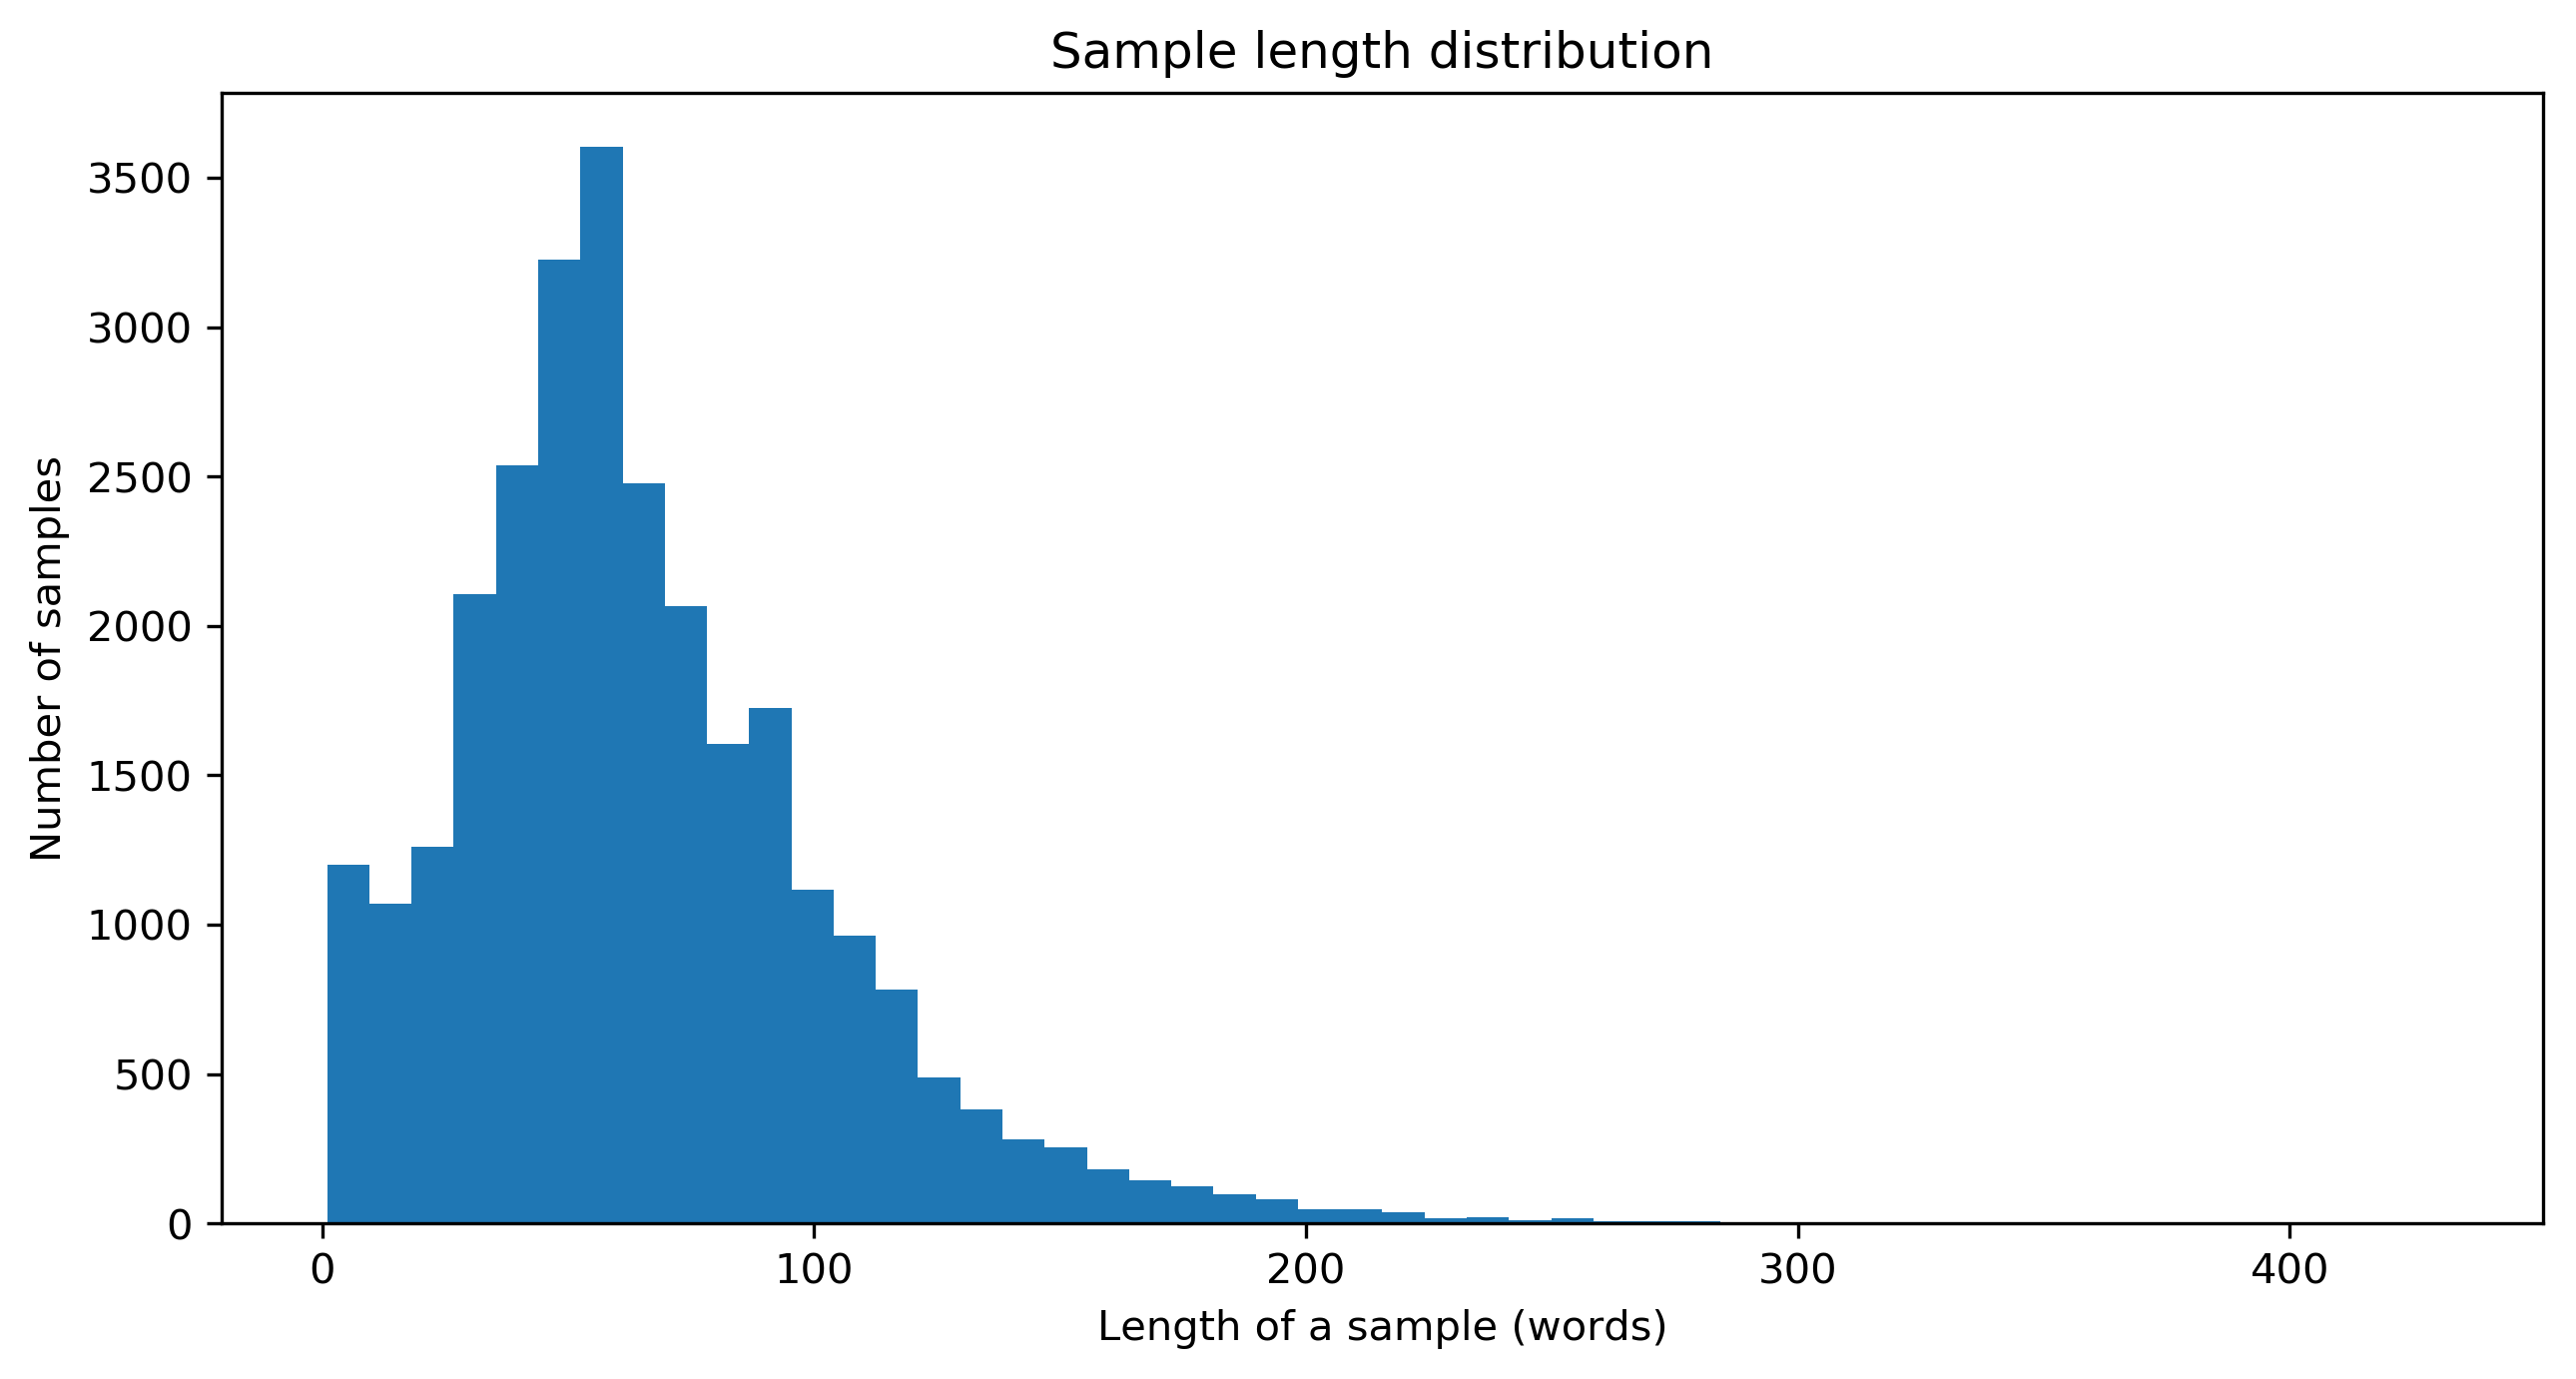

In [8]:
plt.hist([len(s) for s in combined_data.text], 50)
plt.xlabel('Length of a sample (words)')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
# plt.show()
plt.savefig('length-dist.png')

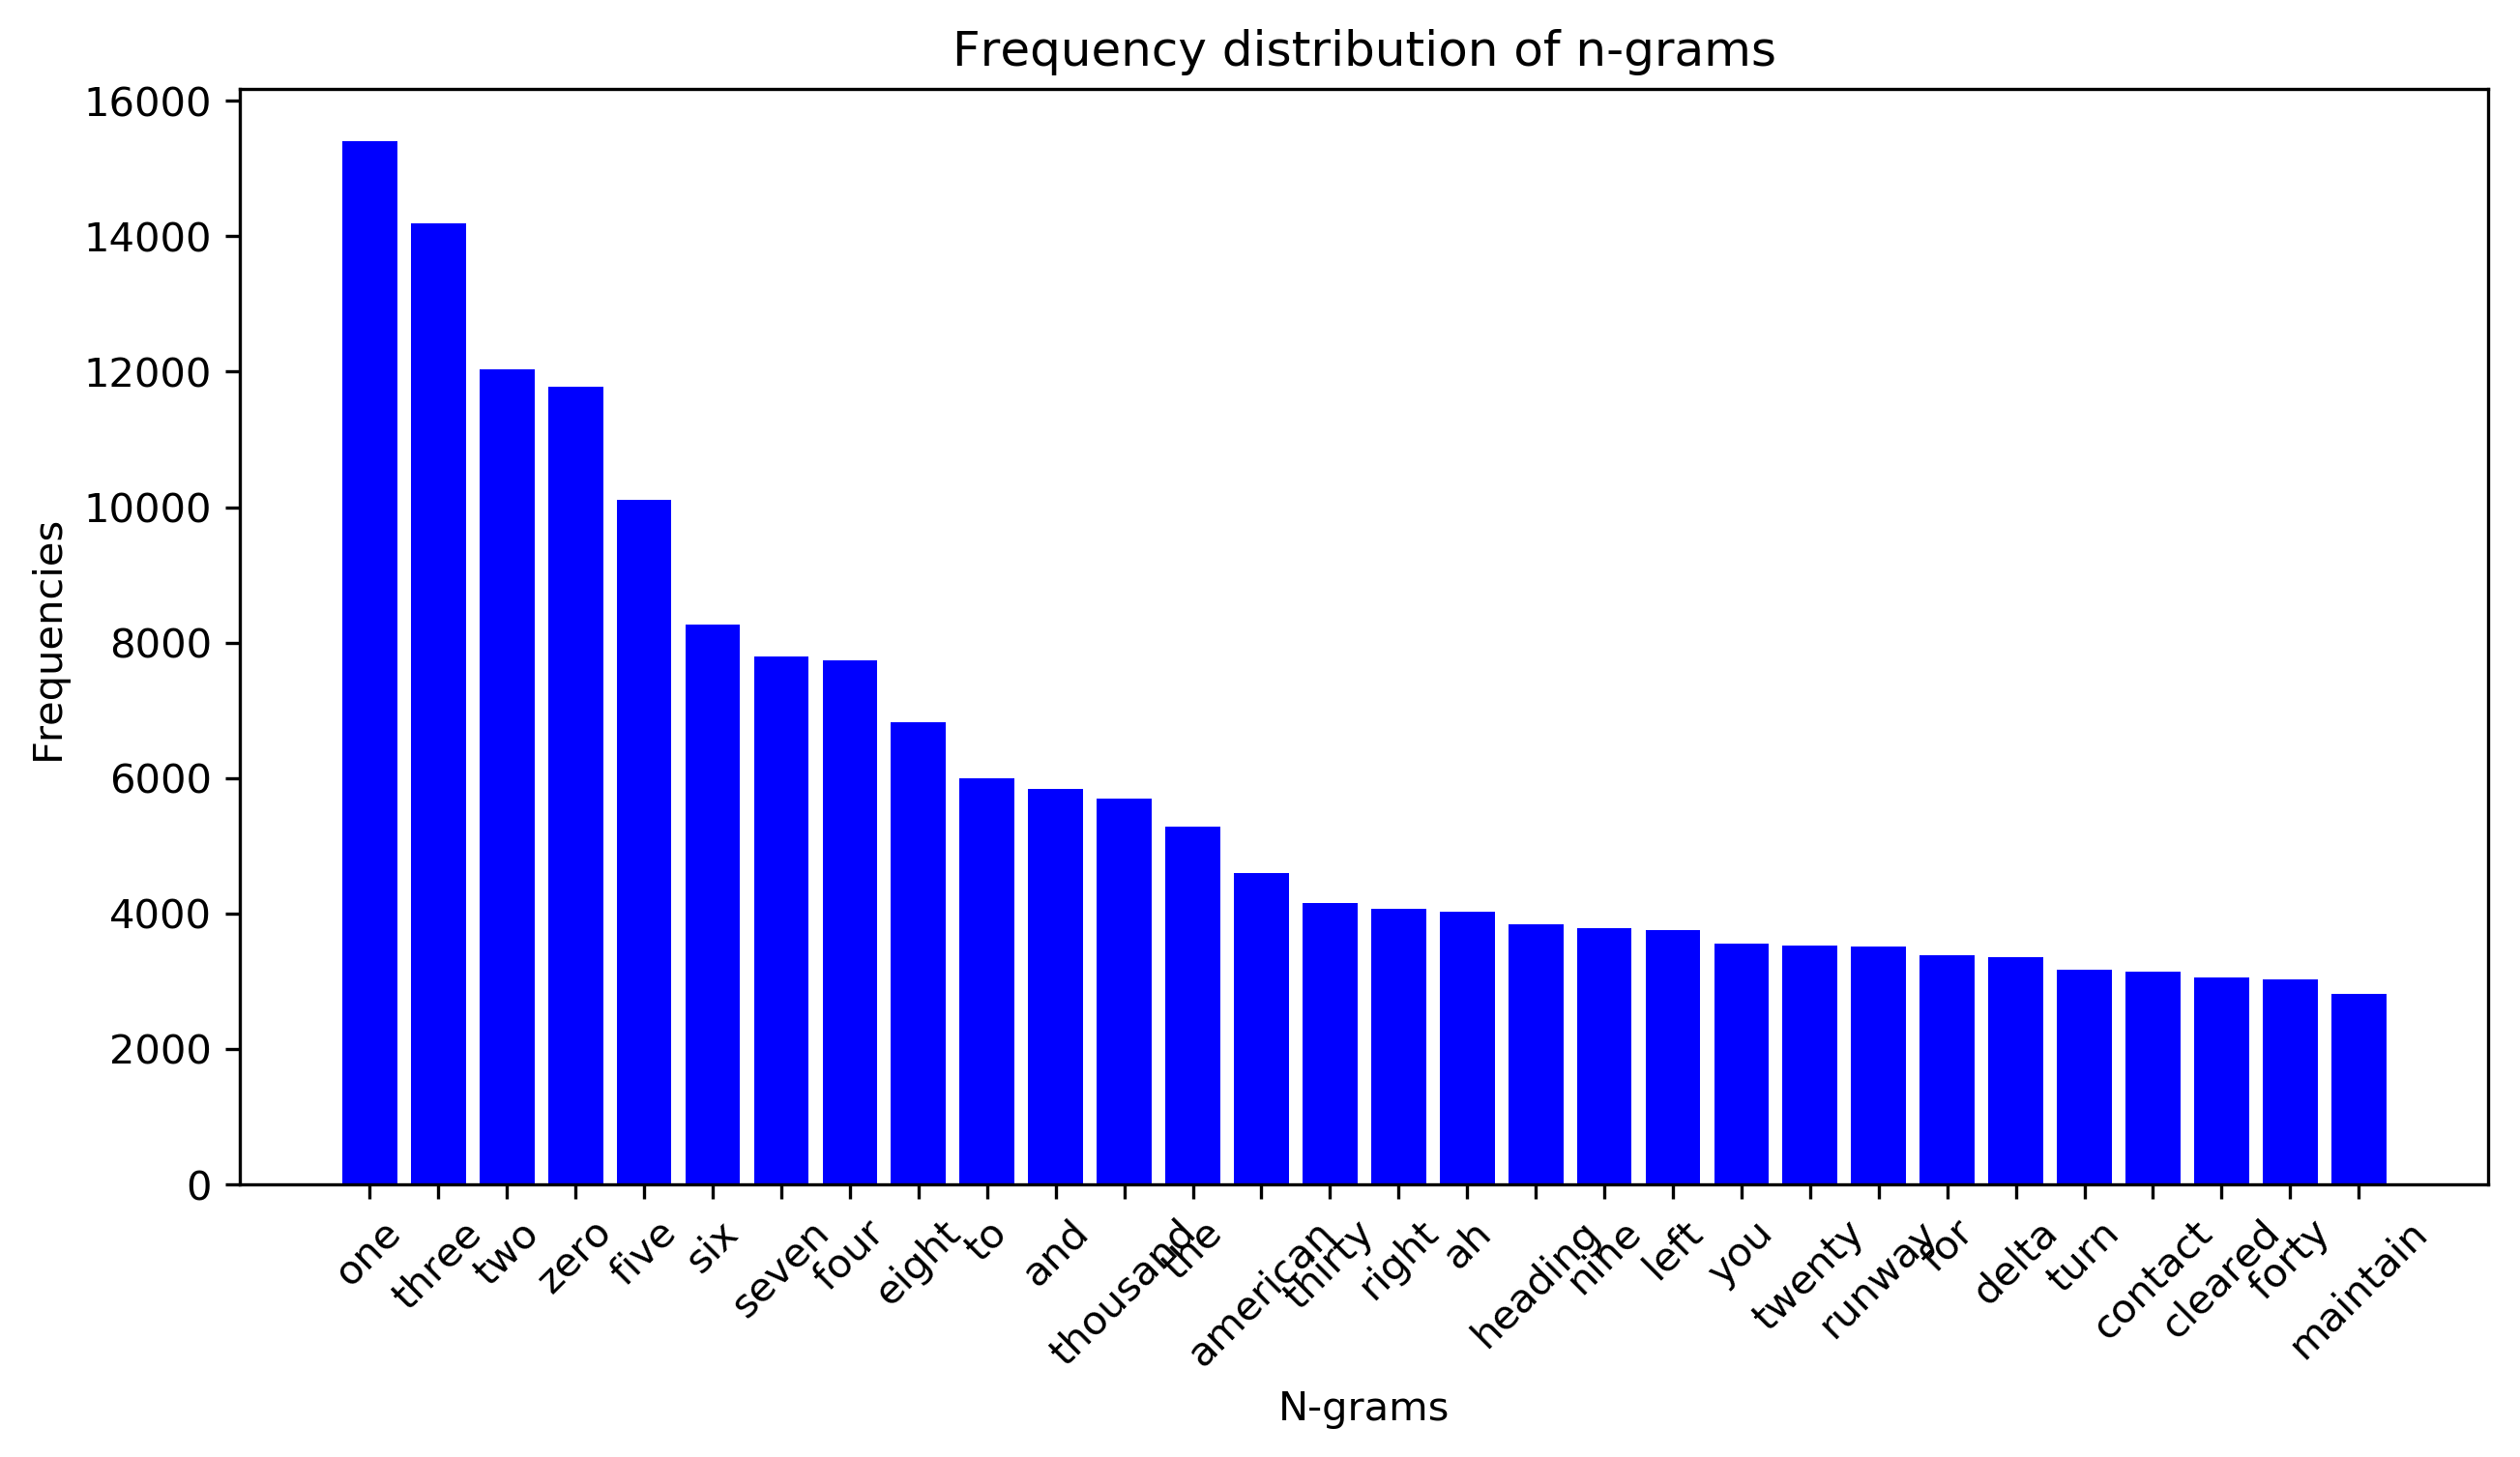

In [9]:
num_ngrams = 30
kwargs = {
    'ngram_range': (1, 2),
    'dtype': 'int32',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': 'word',  # Split text into word tokens.
}
vectorizer = CountVectorizer(**kwargs)

# This creates a vocabulary (dict, where keys are n-grams and values are
# idxices). This also converts every text to an array the length of
# vocabulary, where every element idxicates the count of the n-gram
# corresponding at that idxex in vocabulary.
vectorized_texts = vectorizer.fit_transform(combined_data.text)

# This is the list of all n-grams in the index order from the vocabulary.
all_ngrams = list(vectorizer.get_feature_names())
num_ngrams = min(num_ngrams, len(all_ngrams))
# ngrams = all_ngrams[:num_ngrams]

# Add up the counts per n-gram ie. column-wise
all_counts = vectorized_texts.sum(axis=0).tolist()[0]

# Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
    zip(all_counts, all_ngrams), reverse=True)])
ngrams = list(all_ngrams)[:num_ngrams]
counts = list(all_counts)[:num_ngrams]

idx = np.arange(num_ngrams)
plt.bar(idx, counts, width=0.8, color='b')
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of n-grams')
plt.xticks(idx, ngrams, rotation=45)
plt.savefig('ngram-freq.png')

## Sampling a row

In [12]:
row = combined_data.loc[27611]

print(row.text)
doc = nlp(row.text)

u s air two seventy two behind that american boeing turn right on taxiway eighteen and contact ground point six five on the bridge


In [13]:
displacy.render(doc, style='ent', jupyter=True)
displacy.render(doc, style='dep', jupyter=True)

## Clean text data

- **Sentence 1**: Cross runway 18 at A1, taxi to holding point C, runway 27, Big Jet 345
- **Sentence 2**: MAYDAY, MAYDAY, MAYDAY, Metro Control, Big Jet 345, main electric failure, request immediate landing at Metro, position 35 miles north west of Metro, heading 120 flight level 80 descending, 150 persons on board, endurance three hours

In [14]:
sent1 = 'Cross runway 18 at A1, taxi to holding point C, runway 27, Big Jet 345'
sent2 = 'MAYDAY, MAYDAY, MAYDAY, Metro Control, Big Jet 345, main electric failure, request immediate landing at Metro, position 35 miles north west of Metro, heading 120 flight level 80 descending, 150 persons on board, endurance three hours'

In [15]:
%time doc1 = nlp(sent1)
%time doc2 = nlp(sent2)

CPU times: user 30.1 ms, sys: 1.6 ms, total: 31.7 ms
Wall time: 8.55 ms
CPU times: user 40.3 ms, sys: 1.46 ms, total: 41.8 ms
Wall time: 10.5 ms


In [16]:
print('Sentence 1')
displacy.render(doc1, style='ent', jupyter=True)
displacy.render(doc1, style='dep', jupyter=True)

Sentence 1


In [17]:
df1 = pd.DataFrame(columns=['Word', 'POS', 'Dep', 'Subtree'])
for word in doc1:
    df1 = df1.append({'Word': word.text, 'POS': word.pos_, 'Dep': word.dep_, 'Subtree': ''.join(w.text_with_ws for w in word.subtree)}, ignore_index=True)

df1

,Word,POS,Dep,Subtree
0,Cross,ADJ,compound,Cross
1,runway,NOUN,ROOT,"Cross runway 18 at A1, taxi to holding point C..."
2,18,NUM,nummod,18
3,at,ADP,prep,at A1
4,A1,PROPN,pobj,A1
5,",",PUNCT,punct,","
6,taxi,NOUN,appos,"taxi to holding point C, runway 27"
7,to,ADP,prep,"to holding point C, runway 27"
8,holding,VERB,pcomp,"holding point C, runway 27"
9,point,NOUN,compound,point


In [18]:
print('Sentence 2')
displacy.render(doc2, style='ent', jupyter=True)
displacy.render(doc2, style='dep', jupyter=True)

Sentence 2
